# Exercise 1: MD simulations of LJ-Ag

## SVOLGIMENTO PUNTO 2

---

## Consegna

### Parametri

In all simulations model Ag interatomic interactions using the LJ potential ($\varepsilon = 0.345$ eV and $\sigma = 2.644$ Å) with the cutoff radius at $R_C = 4.5$ Å. Assume $t_\text{th} = 3$ ps as thermalization time and use the simulation cell of 256-atoms (file `fcc100a256.txt` on the elearning page) unless stated differently. From point 3,

### Punto 1 ✅

Use a **sharp-cutoff** (no polynomial junction) approach and find the optimal timestep to perform a simulation from an initial temperature $T_\text{ini} = 50$ K. The optimal timestep is the maximum one such that $\frac{\delta E}{E} < 10^{−5}$. Consider the range 1, 25 fs and perform 5000 integration steps for each trial. Repeat the analysis for $T_\text{ini} = 500$ K and show that the criterion cannot be fulfilled however reducing the timestep.

#### Dall'analisi

Risulta un $dt$ minimo di 20 fs

### Punto 2 ⚒️

Implement a **7-degree polynomial** junction for $R_P < r < R_C$ with $R_P = 4.2$ Å. Use the coefficients $A, B, \dots, H$ for the 0th, 1st, ..., 7th degree term respectively, as provided in the file `poly7.py` on the elearning page. Adapt the definition of forces accordingly. Check that for $T_\text{ini} = 50$ K the simulation is consistent with the sharp-cutoff one and find the optimal timestep for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K.

### Punto 3 🔜

For the following points, implement a steepest-descent procedure to start the simulation from a minimum energy configuration (use C= 0.005 Å/𝑒𝑉 and stop when the maximum force falls below 0.001 𝑒𝑉/Å).


Using the optimal timesteps found in point 2, perform 10 𝑝𝑠 long simulations for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K. Plot $\langle T \rangle$ as a function of $T_\text{ini}$ , check if the condition $\langle T \rangle = \frac{T_\text{ini}}{2}$ is
fulfilled and explain the result. Visualize the atomic trajectories of the atoms at the center of the
cluster and at the cube vertices for both the lowest and highest temperature and comment on
their difference.

---

## Svolgimento

### 0) Importazioni e dati

In [ ]:
import numpy as np
import sys
sys.path.append('../../') 
from libraries.CrystalStructure import CrystalStructure as Crystal
from libraries.CrystalDynamics import CrystalDynamics as Dynamics

In [ ]:
# Nome del file (numero di atomi da studiare: 256)
filename = '../../../data/pos-fcc100-random/fcc100a256.txt'

#### Dati globali

In [3]:
# massa atomica dell'atomo considerato (argento)
silver_mass = 108

# range 1-25 fs per il time step
#time_steps = np.arange(1e-15, 25e-15, 1e-15)
time_steps = np.arange(1e-15, 25e-15, 1e-15)

# 5000 step per ogni simulazione
n_steps = 5000

# tempo di termalizzazione (ogni valore precedente va buttato)
t_th = 3e-12

### 1) Simulazioni

#### 1.1) Dati

In [4]:
# temperature iniziali da studiare
T_ini_punto_2_1 = [50]
T_ini_punto_2_2 = [500, 1000, 2000]

#### 1.2) Mostro che T=50K con giunzione polinomica è consistente

In [5]:
# Raccolgo le energie medie e le dev std
E_tot_means = {}
E_tot_stds = {}

E_tot_list = {}
E_k_list = {}
T_list = {}

for T in T_ini_punto_2_1: # in realtà una sola T iniziale: 50 K
    print(f"\n=== Simulazioni per temperatura iniziale T = {T} K ===")
    
    E_tot_means[T] = []
    E_tot_stds[T] = []
    
    E_tot_list[T] = []
    E_k_list[T] = []
    T_list[T] = []
        
    for dt in time_steps: # venticinque time step diversi
        # Ogni volta inizializzo da capo il cristallo
        cristallo = Crystal.from_file(filename)
        # setto il raggio di cutoff E la giunzione polinomiale
        cristallo.set_R_C(4.5) 
        cristallo.set_R_P(4.2)
    
        print(f"\n--- Simulazione con dt = {dt} s, n_steps = {n_steps} ---")
        simulazione = Dynamics(cristallo, atomic_mass=silver_mass, dt=dt, temp_ini=T)
        simulazione.set_seed(12316543)
        meta_E_tot, meta_E_k, meta_T = simulazione.run_dynamics(n_steps=n_steps, t_th=t_th, output=False, debug=False)
        
        E_tot_means[T].append(np.mean(meta_E_tot))
        E_tot_stds[T].append(np.std(meta_E_tot))
        
        E_tot_list[T].append(meta_E_tot)
        E_k_list[T].append(meta_E_k)
        T_list[T].append(meta_T)


=== Simulazioni per temperatura iniziale T = 50 K ===

--- Simulazione con dt = 1e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 2e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 3.0000000000000002e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 4e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 5.000000000000001e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 6.0000000000000005e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 7e-15 s, n_steps = 5000 ---
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.

--- Simulazione con dt = 8

#### 1.3) Analisi e plot

Grafico $\delta E/\langle E\rangle$ vs dt

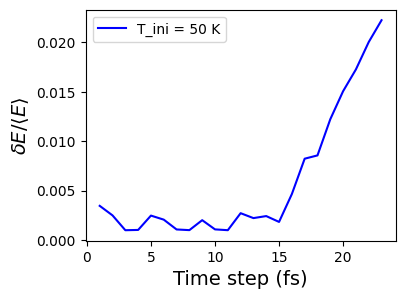

In [8]:
import matplotlib.pyplot as plt

rapporti = {}
colors = ['blue', 'red']

for i, T in enumerate(T_ini_punto_2_1):
    rapporto = np.array(E_tot_stds[T])/np.abs(np.array(E_tot_means[T]))
    rapporti[T] = rapporto
    plt.figure(figsize=(4,3), dpi=100)
    plt.plot(time_steps[:-1]*1e15, rapporto[:-1], color=colors[i], label=f'T_ini = {T} K')
    plt.xlabel('Time step (fs)', fontsize=14)
    plt.ylabel(r'$\delta E/\langle E \rangle$', fontsize=14)
    plt.legend()
    plt.show()

In [7]:
# prendo l'ultimo rapporto minore di 1e-5 per ogni temperatura
indice_ultimo = -1
for T in T_ini_punto_2_1:
    rapporto = rapporti[T]
    for i, val in enumerate(rapporto):
        if val < 1e-5:
            indice_ultimo = i
            
    if i != -1:
        print(f"\nPer T_ini = {T} K, l'ultimo rapporto < 1e-5 è a dt = {time_steps[T][indice_ultimo]*1e15} fs con rapporto = {rapporto[indice_ultimo]}")
    else:   
        print(f"\nPer T_ini = {T} K, non esiste un rapporto < 1e-5 nei time step considerati.")

IndexError: index 50 is out of bounds for axis 0 with size 24

Non si scende sotto il valore di tolleranza partendo da 500K!

In [ ]:
E_tot_means

{50: [np.float64(-440.86811611662756),
  np.float64(-442.0788924769139),
  np.float64(-436.6115720663665),
  np.float64(-436.61155731168503),
  np.float64(-442.69856306927204),
  np.float64(-442.91242071415166),
  np.float64(-436.3760951718884),
  np.float64(-436.3681349063331),
  np.float64(-442.640806110408),
  np.float64(-436.2221311676998),
  np.float64(-436.21966954620405),
  np.float64(-442.0044147947133),
  np.float64(-438.6592820742485),
  np.float64(-438.91330191143305),
  np.float64(-435.99897381631797),
  np.float64(-438.6399668357605),
  np.float64(-437.12572447941443),
  np.float64(-436.90919853769446),
  np.float64(-434.33243328742145),
  np.float64(-432.19597066966116),
  np.float64(-430.14075605535845),
  np.float64(-428.6883559060599),
  np.float64(-426.7772079857256),
  np.float64(147238006901096.1)]}

In [ ]:
E_tot_stds

{50: [np.float64(3.2343667899260833),
  np.float64(2.6770732381422415),
  np.float64(0.9290708812487602),
  np.float64(0.8496075426128713),
  np.float64(2.1592317560445244),
  np.float64(1.4719905810521265),
  np.float64(0.7962584455572534),
  np.float64(0.7171438131741869),
  np.float64(1.5593220011672904),
  np.float64(0.6558555387831195),
  np.float64(0.6428700571683273),
  np.float64(1.6687686116950078),
  np.float64(2.595563371348913),
  np.float64(2.546426467760933),
  np.float64(1.5478558368816875),
  np.float64(2.390024267905126),
  np.float64(3.586470399631454),
  np.float64(3.7872534467019765),
  np.float64(5.463621493505684),
  np.float64(6.814990388913826),
  np.float64(7.756859945482713),
  np.float64(9.045033720755592),
  np.float64(10.078781505155854),
  np.float64(180998739548262.62)]}